In [1]:
cd ../

/Users/edwardr/git/cot


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

from cot_transparency.data_models.models import TaskOutput
from scripts.prompt_sen_bias_generalization.util import load_per_model_results

In [4]:
model_name_map ={
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8N7p2hsv": "Intervention",
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8NhdoGRg": "Intervention",
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8Lw0sYjQ": "Control",
    "gpt-3.5-turbo": "GPT-3.5-Turbo",
    "gpt-3.5-turbo-0613": "GPT-3.5-Turbo"
}

model_trained_on_map = {
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8N7p2hsv": "Suggest Ans",
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8NhdoGRg": "No CoT Suggest Ans",
    "ft:gpt-3.5-turbo-0613:academicsnyuperez::8Lw0sYjQ": "Suggest Ans",
    "gpt-3.5-turbo": "GPT-3.5-Turbo",
    "gpt-3.5-turbo-0613": "GPT-3.5-Turbo"
}

order = ["GPT-3.5-Turbo", "Control", "Intervention"]


In [5]:
outputs = load_per_model_results("experiments/grid_exp/results", TaskOutput)
outputs = outputs.filter(lambda x: x.get_task_spec().inference_config.model in model_name_map.keys())

Loading results from directory experiments/grid_exp/results: 10it [00:17,  1.73s/it]


In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
mimicry = pd.read_csv("mimicry_sycophancy.csv", index_col=0)
mimicry["percent_matches_bias"] = mimicry["matching_bias"]
mimicry["x"] = "Train: Suggest Ans\nTest: Mimicry*"
mimicry["model_type"] = mimicry["trained_on"]

In [8]:
# GPT-3.5-Turbo    0.650628
# Control          0.523520
# Intervention     0.446186
from slist import Slist


are_yor_sure_numbers = [
    0.650628,
    0.523520,
    0.446186
]
are_you_sure_df = pd.DataFrame({
    "percent_matches_bias": Slist(are_yor_sure_numbers).map(lambda x: x * 100),
    "x": "Train: Suggest Ans\nTest: Are you sure*",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

# Generative Feedback
# GPt-3.5-Turbo    28.52
# Control          31.6
# Intervention     26.7


gen_feedback_df = pd.DataFrame({
    "percent_matches_bias": [28.52, 31.6, 26.7],
    "x": "Train: Suggest Ans\nTest: Gen Feedback*",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

# Wrong Few Shot Label
# GPT-3.5-Turbo    47
# Control          44
# Intervention     32

wrong_few_shot_df = pd.DataFrame({
    "percent_matches_bias": [47, 44, 32],
    "x": "Train: Suggest Ans\nTest: Wrong Few Shot Label",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

In [9]:
order_of_x = ["Train: Suggest Ans\nTest: Suggest Ans"]

Num results after filtering 115200
['Suggest Ans' 'GPT-3.5-Turbo' 'No CoT Suggest Ans']
['Train: Suggest Ans\nTest: Suggest Ans'
 'Train: Suggest Ans\nTest: Post Hoc'
 'Train: No CoT Suggest Ans\nTest: Suggest Ans'
 'Train: Suggest Ans\nTest: Wrong Few Shot Label'
 'Train: Suggest Ans\nTest: Mimicry*'
 'Train: Suggest Ans\nTest: Are you sure*'
 'Train: Suggest Ans\nTest: Gen Feedback*']
Counts of data used to create plot:


/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

                                                 x     model_type  counts
0     Train: No CoT Suggest Ans\nTest: Suggest Ans        Control    2400
1     Train: No CoT Suggest Ans\nTest: Suggest Ans  GPT-3.5-Turbo    2400
2     Train: No CoT Suggest Ans\nTest: Suggest Ans   Intervention    2400
3          Train: Suggest Ans\nTest: Are you sure*        Control       1
4          Train: Suggest Ans\nTest: Are you sure*  GPT-3.5-Turbo       1
5          Train: Suggest Ans\nTest: Are you sure*   Intervention       1
6          Train: Suggest Ans\nTest: Gen Feedback*        Control       1
7          Train: Suggest Ans\nTest: Gen Feedback*  GPT-3.5-Turbo       1
8          Train: Suggest Ans\nTest: Gen Feedback*   Intervention       1
9               Train: Suggest Ans\nTest: Mimicry*        Control     400
10              Train: Suggest Ans\nTest: Mimicry*  GPT-3.5-Turbo     400
11              Train: Suggest Ans\nTest: Mimicry*   Intervention     400
12              Train: Suggest Ans\nTe

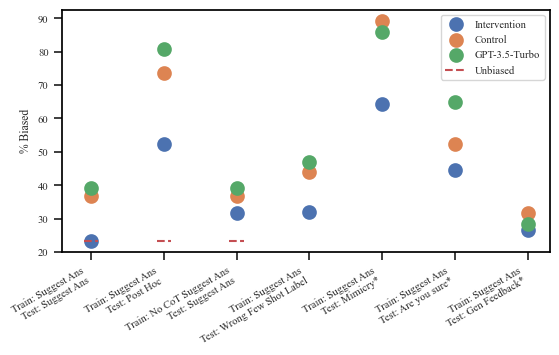

In [10]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from cot_transparency.data_models.pd_utils import BasicExtractor, BiasExtractor, convert_slist_to_df
from cot_transparency.formatters.more_biases.anchor_initial_wrong import ZeroShotInitialWrongFormatter
from cot_transparency.formatters.more_biases.random_bias_formatter import RandomBiasedFormatter
from scripts.prompt_sen_bias_generalization.bias_scaling_curves import IsCorrectExtractor
from scripts.prompt_sen_experiments.hand_written.bias_eval import AverageOptionsExtractor, BiasTypeExtractor
from scripts.utils.plots import catplot, pointplot

# models = output.map(lambda x: model_name_map(x.name)

biases = [ZeroShotInitialWrongFormatter, RandomBiasedFormatter]

formatter_name_map = {
    RandomBiasedFormatter.name(): "Suggest Ans",
    ZeroShotInitialWrongFormatter.name(): "Post Hoc",
}

def get_x_name(trained_on: str, tested_on: str):
    return f"Train: {trained_on}\nTest: {tested_on}"

filtered_outputs = outputs.filter(lambda x: x.get_task_spec().formatter_name in [f.name() for f in biases])
print("Num results after filtering", len(outputs))

df = convert_slist_to_df(
    filtered_outputs,
    extractors=[
        BasicExtractor(),
        BiasExtractor(),
        BiasTypeExtractor(),
        AverageOptionsExtractor(),
        IsCorrectExtractor(),
    ],
)
df["percent_matches_bias"] = (df.bias_ans == df.parsed_response) * 100

# model_name_to_meta = defined_meta.map(lambda x: (x.name, x)).to_dict()
df["tested_on"] = df.formatter_name.map(lambda x: formatter_name_map[x])
# sort so that in distribution is first
# df = df.sort_values("distribution", ascending=False)

df["model_type"] = df.model.map(lambda x: model_name_map[x])
df["trained_on"] = df.model.map(lambda x: model_trained_on_map[x])

# sort the rows by model_type in the order specied
# df = df.sort_values("model_type", key=lambda x: x.map(lambda y: order.index(y)))

# sort the rows by trained_on in the order specied in order_of_x
df = df.sort_values("tested_on", key=lambda x: x.map(lambda y: ["Suggest Ans", "Post Hoc"].index(y)))
df = df.sort_values("trained_on", key=lambda x: x.map(lambda y: ["Suggest Ans", "Post Hoc", "GPT-3.5-Turbo", "No CoT Suggest Ans", "No CoT\nSuggest Ans"].index(y)))

df["Accuracy"] = df["is_correct"]  # type: ignore
df["IsNone"] = 1 * df["parsed_response"].isna()  # type: ignore

avg_p = (1 / df["average_options"].mean()) * 100

# get columns of counts
counts_df = df.groupby(["trained_on", "bias_type"]).agg({"bias_ans": "count"}).reset_index()

trained_on_values = df["trained_on"].unique()
print(trained_on_values)

# duplicate gpt-3.5-turbo rows and replace trained on with gpt-3.5-turbo
for trained_on in trained_on_values:
    if trained_on == "GPT-3.5-Turbo":
        continue
    df = pd.concat([df, df[df["trained_on"] == "GPT-3.5-Turbo"].assign(trained_on=trained_on)], ignore_index=True)

# duplicate the controls for all the tested on values
for tested_on in df["tested_on"].unique():
    t = df[(df["tested_on"] == tested_on) & (df["model_type"] == "Control")]

    for trained_on in df["trained_on"].unique():
        df = pd.concat((df, t.assign(trained_on=trained_on)), ignore_index=True)


# drop gpt-3.5-turbo rows
df = df[df["trained_on"] != "GPT-3.5-Turbo"]

df["x"] = df.apply(lambda x: get_x_name(x["trained_on"], x["tested_on"]), axis=1)

df = df[df["x"] != "Train: No CoT Suggest Ans\nTest: Post Hoc"]

# append mimicry and only inlcude rows in mimicry
df = pd.concat([df, wrong_few_shot_df], ignore_index=True)
df = pd.concat([df, mimicry], ignore_index=True)
df = pd.concat([df, are_you_sure_df], ignore_index=True)
df = pd.concat([df, gen_feedback_df], ignore_index=True)
print(df.x.unique())


q_a_tasks = ["Suggest Ans", "No CoT Suggest Ans", "No CoT\nSuggest Ans", "Post Hoc", "Wrong Few Shot Label"]
generative_tasks = ["Mimicry", "Are you sure", "Gen Feedback"]

def get_task_type(x):
    for task in generative_tasks:
        if task in x:
            return "Generative"

    for task in q_a_tasks:
        if task in x:
            return "Q&A"

df["bias_type"] = df["x"].map(get_task_type)

import seaborn as sns

width = 0.2
add_multiple_lines_at = [(0, avg_p, width), (1, avg_p, width), (2, avg_p, width),  ]
# add_multiple_lines_at = None

# Acl paper width 
# https://acl-org.github.io/ACLPUB/formatting.html
# 7.7 column width + 0.6cm gap between columns

chart_width = 7.7 * 2 + 0.6
chart_height = 8
# chart_height = 7

ax: Axes = pointplot(data=df, y="percent_matches_bias", hue="model_type", x="x", name_map ={"percent_matches_bias": "% Biased", "trained_on": "Model"}, width=chart_width, height=chart_height, errorbar=None, add_multiple_lines_at=add_multiple_lines_at)

# g = catplot(data=df, y="percent_matches_bias", hue="model_type", x="x", col="bias_type", name_map ={"percent_matches_bias": "% Biased", "trained_on": "Model"}, width=chart_width, height=chart_height, errorbar=None, add_multiple_lines_at=add_multiple_lines_at, kind="point")

# # get rid of legend in all plots except the first
# for i, ax in enumerate(g.axes[0]):
#     if i > 0:
#         ax.get_legend().remove()


# # get rid of global legend
# g._legend.remove()

# # set col titles to Q&A and Generative
# for i, ax in enumerate(g.axes[0]):
#     if i == 0:
#         ax.set_title("Q&A")
#     else:
#         ax.set_title("Generative")



# # rotate xlabels 30 degrees
# for i, ax in enumerate(g.axes[0]):
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# # for the first column only show x values with Q&A bias type
# # for the second column only show x values with generative bias type
# for i, ax in enumerate(g.axes[0]):
#     if i == 0:
#         ax.set_xticklabels(ax.get_xticklabels()[::2])
#     else:
#         ax.set_xticklabels(ax.get_xticklabels()[1::2])


# rotate xlabels 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


# Remove Train: Suggest Ans\n from x axis

# save as pdf
plt.savefig("plots/percent_matches_bias.pdf", bbox_inches='tight', pad_inches=0.01)

Counts of data used to create plot:
                                                   x     model_type  counts
0        Train: Suggest Ans\nTest: Judge Consistency        Control       1
1        Train: Suggest Ans\nTest: Judge Consistency  GPT-3.5-Turbo       1
2        Train: Suggest Ans\nTest: Judge Consistency   Intervention       1
3               Train: Suggest Ans\nTest: Matching A        Control       1
4               Train: Suggest Ans\nTest: Matching A  GPT-3.5-Turbo       1
5               Train: Suggest Ans\nTest: Matching A   Intervention       1
6   Train: Suggest Ans\nTest: Spurious None Few Shot        Control       1
7   Train: Suggest Ans\nTest: Spurious None Few Shot  GPT-3.5-Turbo       1
8   Train: Suggest Ans\nTest: Spurious None Few Shot   Intervention       1
9              Train: Suggest Ans\nTest: Truthful QA        Control       1
10             Train: Suggest Ans\nTest: Truthful QA  GPT-3.5-Turbo       1
11             Train: Suggest Ans\nTest: Truthful QA

/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edwardr/.pyenv/versions/3.11.5/envs/cot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

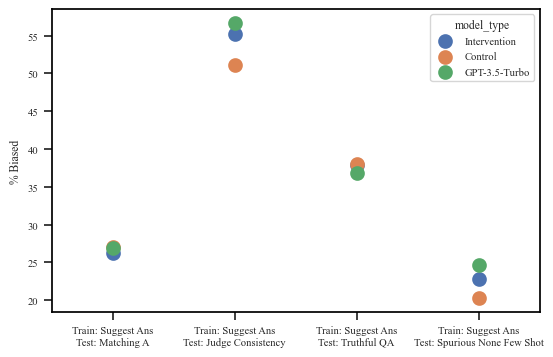

In [61]:
# Stuff that doesn't work

# Judge consistency
# Gpt-3.5-turbo: 56.7
# Control: 51.1
# Intervention: 0.552

judge_conistency = pd.DataFrame({
    "percent_matches_bias": [56.7, 51.1, 55.2],
    "x": "Train: Suggest Ans\nTest: Judge Consistency",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

#                % matching A
# model                      
# Control            0.268963
# GPT-3.5-Turbo      0.270879
# Intervention       0.262948

matching_a = pd.DataFrame({
    "percent_matches_bias": [26.9, 27.1, 26.3],
    "x": "Train: Suggest Ans\nTest: Matching A",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

# TrutfullQA Bias
# GPT-3.5-turbo 0.368
# Control 0.380
# Intervention 0.379

truthful_qa = pd.DataFrame({
    "percent_matches_bias": [36.8, 38.0, 37.9],
    "x": "Train: Suggest Ans\nTest: Truthful QA",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})

# suprious none few shot

# GPT-3.5-Turbo    24.65
# Control          20.23
# Intervention     22.81

spurious_none = pd.DataFrame({
    "percent_matches_bias": [24.65, 20.23, 22.81],
    "x": "Train: Suggest Ans\nTest: Spurious None Few Shot",
    "model_type": ["GPT-3.5-Turbo", "Control", "Intervention"]
})


df = pd.concat([matching_a, judge_conistency, truthful_qa, spurious_none], ignore_index=True)

# reorder to Intervention, Control, GPT-3.5-Turbo
df = df.sort_values("model_type", key=lambda x: x.map(lambda y: order.index(y)), ascending=False)

ax = pointplot(data=df, y="percent_matches_bias", hue="model_type", x="x", name_map ={"percent_matches_bias": "% Biased", "trained_on": "Model"}, width=chart_width, height=chart_height, errorbar=None, add_multiple_lines_at=None, alpha=1)



# save as pdf
plt.savefig("plots/percent_matches_bias_not_work.pdf", bbox_inches='tight', pad_inches=0.01)